<img src='https://gitlab.eumetsat.int/eumetlab/oceans/ocean-training/tools/frameworks/-/raw/main/img/Standard_banner.png' align='right' width='100%'/>

<a href="../../Index.ipynb" target="_blank"><< Index</a>
<br>
<a href="../Selection_and_validation/Selecting_exploring_validating_SST_products.ipynb">Selecting, exploring and validating sea surface temperature products >></a>

<font color="#138D75">**Copernicus Marine Training Service**</font> <br>
**Copyright:** 2024 European Union <br>
**License:** MIT <br>
**Authors:** Ben Loveday (EUMETSAT/Innoflair UG), Gary Corlett (EUMETSAT), Hayley Evers-King (EUMETSAT)

<html>
    <div style="float:left"><a href="https://gitlab.eumetsat.int/eumetlab/oceans/ocean-training/applications/sea-surface-temperature-applications"><img src="https://img.shields.io/badge/open-EUMETLAB-E67E22.svg?style=flat&logo=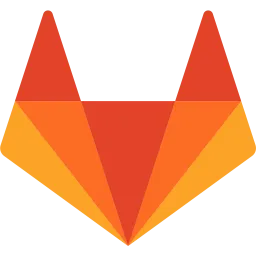" alt="Open in EUMETLAB"></a></div>
    <div style="float:left"><p>&emsp;</p></div>
  </div>
  <div style="width:100%">
    <div style="float:left"><a href="https://user.eumetsat.int/search-view?sort=startDate%20desc&facets=%7B%22contentTypes%22:%5B%22Resources%7CSoftware%20%26%20code%22%5D,%22org-satellite-sensor%22:%5B%22EUMETSAT%7CSentinel-3%7CSLSTR%22%5D,%22theme%22:%5B%22Marine%22,%22Marine%7CMaritime%20safety%22,%22Marine%7COcean%20biogeochemistry%22,%22Marine%7COcean%20dynamics%22,%22Marine%7CWater%20quality%22%5D%7D"><img src="https://img.shields.io/badge/open-USER PORTAL-154360.svg?style=flat&logo=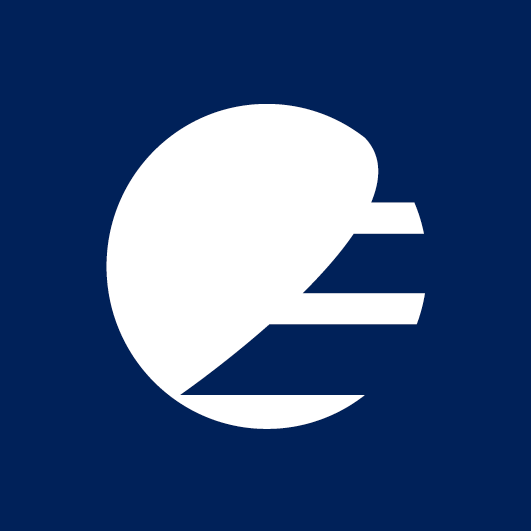" alt="Open in user portal"></a></div>
    <div style="float:left"><p>&emsp;</p></div>
  </div>
</html>

<div class="alert alert-block alert-success">
<h3>Sea surface temperature applications</h3></div>

<div class="alert alert-block alert-warning">
    
<b>PREREQUISITES </b>

This notebook has the following prerequisites:
- A **<a href="https://eoportal.eumetsat.int/" target="_blank">EUMETSAT Earth Observation Portal account</a>** to download from the EUMETSAT Data Store.

There are no prerequisite notebooks for this module, but users may wish to review the **<a href="https://gitlab.eumetsat.int/eumetlab/oceans/ocean-training/sensors/learn-slstr" target="_blank">learn-slstr</a>** repository, if they want more information on using Copernicus Sentinel-3 SLSTR products.

</div>
<hr>

# Thermal image interpretation and estimation of sea surface temperature
<font color="#138D75">**Devloped by EUMETSAT in support of the 2025 ESA OTC course**</font>

### Data used

| Dataset | EUMETSAT collection ID| EUMETSAT collection<br>description | Copernicus MarineData Store product ID | Copernicus Marineproduct description | WEkEO dataset ID | WEkEO description |
|:--------------------:|:-----------------------:|:-------------:|:-----------------:|:-----------------:|:-----------------:|:-----------------:|
| Sentinel-3 SLSTR level 1b | EO:EUM:DAT:0411 | <a href="https://user.eumetsat.int/catalogue/EO:EUM:DAT:SENTINEL-3:SL_1_RBT___NTC" target="_blank">Description</a> | - | - | EO:EUM:DAT:SENTINEL-3:SL_1_RBT___ | <a href="https://www.wekeo.eu/data?view=dataset&dataset=EO%3AEUM%3ADAT%3ASENTINEL-3%3ASL_1_RBT___" target="_blank">Description</a> |

### Learning outcomes

At the end of this notebook you will;
* be able to interpret examples of level-2 SST scenes of oceanographic features from your voyage
* know what data is available at the fundamental levels of SST processing
* be aware of the difference between solar and thermal channels
* understand the importance and practical basis of cloud masking

### Outline

<center><figure>
  <img src='../../img/SST_Alboran.png' align='right' width='100%'/>
  <figcaption>Figure 1: An example level-2 SST scene of the Alboran Gyre, from Copernicus Sentinel-3B SLSTR on May 21, 2024.</figcaption>
</figure></center>

Sea surface temperature (SST) is an essential climate variable (ECV). It controls ocean-atmosphere heat transfer, which drives our weather and climate, making it an important parameter to monitor climate modes such as ENSO as well as an indicator of climate change. It is also a fundamental parameter in oceanography, giving us information on ocean dynamics from the basin to the mesoscale. Through the retrieval of SST, we can analyse the spatio-temporal evolution of western boundary currents, upwelling systems, ocean fronts and eddies (Figure 1), as well as the occurrence of marine heatwaves and the effects of biophysical interactions. This is far from an exhaustive list!

SST can be measured from space using either infrared or microwave radiometry, but their are distinct challenges to its retrieval. We must be able to;
1. effectively characterise the atmosphere to correct for its effects and,
2. quality control our outputs such that signal from pixels that do not represent the ocean surface are removed; e.g. those from land and cloud.

This notebook will introduce you to working with data from the infrared Sea and Land Surface Radiometer instrument (SLSTR) aboard Copernicus Sentinel-3, helping you to interpret imagery, learn about the sensor and its data at various levels, and guiding you through some of the processes associated with quality control and cloud masking. The examples chosen such that they are relevant to the 2025 ESA OTC cruise aboard the Statsraad Lehmkuhl.

Before we begin you should note that this notebook can be run locally, or on a remote cloud system, by cloning the **<a href="https://gitlab.eumetsat.int/eumetlab/oceans/ocean-training/applications/sea-surface-temperature-applications" target="_blank">sea-surface-temperature-applications</a>** repository. The README file will fully describe how to create an appropriate Python environment to run this code.

**Note: to download the required EUMETSAT SLSTR data, you will need to register for a <a href="https://eoportal.eumetsat.int/" target="_blank">EUMETSAT Earth Observation Portal account</a> account. Please see the prerequisites for more information on how to do this**.

<div class="alert alert-info" role="alert">

## <a id='TOC_TOP'></a>Contents

</div>

1. [Step 1: Setting up our analysis](#section1)
1. [------: A quick preamble on functions](#section0)
1. [Step 2: Viewing some level-2 SST scenes](#section2)
1. [Step 3: Acquiring SLSTR level-1B data](#section3)
1. [Step 4: Reading in the radiance and brightness temperature data](#section4)
1. [Step 5: Comparing visible and thermal channel data](#section5)
1. [Step 6: Characterising the atmosphere](#section6)
1. [Step 7: Developing cloud masks](#section7)

<hr>

<div class="alert alert-info" role="alert">

## <a id='section1'></a>Step 1: Setting up our analysis
[Back to top](#TOC_TOP)

</div>

We begin by importing all of the libraries that we need to run this notebook. If you have built your python using the environment file provided in this repository, then you should have everything you need. For more information on building environment, please see the repository **<a href="../README.md" target="_blank">README</a>**.

In [ ]:
import os                               # a library that allows us access to basic operating system commands
from pathlib import Path                # a library that helps construct system path objects
import eumdac                           # a tool that helps us download via the eumetsat/data-store
import getpass                          # a library to help us enter passwords
import shutil                           # a library that allows us access to basic operating system commands like copy
import zipfile                          # a library that allows us to unzip zip-files.
import time                             # a library that gives us the ability to pause a script briefly
import xarray as xr                     # a library that supports the use of multi-dimensional arrays in Python
import numpy as np                      # a library that lets us work with arrays; we import this with a new name "np"
import glob                             # a library that aids in searching for files
import eumartools                       # a EUMETSAT library that support working with Sentinel-3 products
import matplotlib.pyplot as plt         # a library that support plotting
import cartopy                          # a library that support mapping
import matplotlib.ticker as mticker     # a library that extends plotting support
from xcube.webapi.viewer import Viewer  # a library that provides the Xcube viewer
import warnings                         # a library that helps us handle warnings

# turn off any script warnings
warnings.filterwarnings('ignore')

Next we will create a download directory called "products", where we will store any data we will download in this notebook.

*Note that you can find any pre-processed data included in this workflow in the "preprocessed" directory.*

In [ ]:
download_dir = os.path.join(os.getcwd(), "products")
os.makedirs(download_dir, exist_ok=True)

<div class="alert alert-warning" role="alert">

## <a id='section0'></a>A quick preamble on functions
[Back to top](#TOC_TOP)

</div>

Before we start the notebook proper, we will define a quick function that we will use throughout. The function is quite simple and just adds embellishments (gridlines, labels etc) to plots.

In [ ]:
def embellish_plot(m):
    """Quick function to embellish SLSTR plots with gridlines and labels

    Args:
        m (axis): the axis to plot into
    Returns:
        None
    """
    # Embellish with gridlines
    g1 = m.gridlines(draw_labels = True, zorder=20, color='0.0', linestyle='--',linewidth=0.5)
    g1.xlocator = mticker.FixedLocator(np.arange(-180, 180, 5))
    g1.ylocator = mticker.FixedLocator(np.arange(-90, 90, 5))
    g1.top_labels = False
    g1.right_labels = False
    g1.xlabel_style = {'color': 'black'}
    g1.ylabel_style = {'color': 'black'}
    m.set(facecolor = "1.0")
    m.axis('off')

<div class="alert alert-info" role="alert">

## <a id='section2'></a>Step 2: Viewing some level-2 SST scenes
[Back to top](#TOC_TOP)

</div>

Lets start by familiarising ourself with how SST data look. We will do this interactively using a package called `xcube` that lets us navigate around some pre-prepared scenes. The cell below will set up the xcube "viewer", setting up the channels and limits for displaying our data.

In [ ]:
%%capture
viewer = Viewer(
    server_config={
        "Styles": [
            {"Identifier": "SST_highlat",
                 "ColorMappings": {
                     "SST_skin_Q4plus": {"ValueRange": [275, 285], "ColorBar": "Spectral_r"},
                     "brightness_temperature_channel_1": {"ValueRange": [260, 285], "ColorBar": "Spectral_r"},
                     "brightness_temperature_channel_2": {"ValueRange": [260, 285], "ColorBar": "Spectral_r"},
                     "brightness_temperature_channel_3": {"ValueRange": [260, 285], "ColorBar": "Spectral_r"}}},
            {"Identifier": "SST",
                "ColorMappings": {
                    "SST_skin_Q4plus": {"ValueRange": [285, 295], "ColorBar": "Spectral_r"},
                    "brightness_temperature_channel_1": {"ValueRange": [260, 295], "ColorBar": "Spectral_r"},
                    "brightness_temperature_channel_2": {"ValueRange": [260, 295], "ColorBar": "Spectral_r"},
                    "brightness_temperature_channel_3": {"ValueRange": [260, 295], "ColorBar": "Spectral_r"}}}]})

Now we will select our pre-processed data and add them to our viewer...

In [ ]:
locations = {}
locations['Norwegian Sea'] = {'data' : os.path.join(os.getcwd(), "preprocessed", "Norwegian_Sea.zarr"), 'style' : 'SST_highlat'}
locations['NE Atlantic'] = {'data' : os.path.join(os.getcwd(), "preprocessed", "NE_atl.zarr"), 'style' : 'SST_highlat'}
locations['Alboran Gyre'] = {'data' : os.path.join(os.getcwd(), "preprocessed", "Alboran.zarr"), 'style' : 'SST'}
locations['NW Mediterranean Sea'] = {'data' : os.path.join(os.getcwd(), "preprocessed", "NW_med.zarr"), 'style' : 'SST'}

for location in locations:
    viewer.add_dataset(xr.open_zarr(locations[location]['data']), title=location, style=locations[location]['style'])

..and finally we'll open our viewer!

In [ ]:
viewer.show()

Using the viewer, you should be able to navigate through 4 different scenes using the "Dataset" menu on the left hand side of the menu bar. Each of these scenes if taken from Copernicus Sentinel-3 SLSTR level-2 granule, and includes 4 channels, which can be selected from the "Variable" menu:

1. the "skin" sea surface temperature (SST-skin-Q4) retrieved from the sensor, flagged at quality level 4 (out of 5) or higher and,
1. the brightness temperatures measured in the three thermal infrared bands (S7 at 3.74μm, S8 at 10.85μm and S9 at 12μm) (Top of atmosphere brightness temperature)

Brightness temperature is the fundamental infrared measurements that we make at the top of the atmosphere that allows us to retrieve SST.

<div class="alert alert-block alert-warning">

### Challenge:

Take some time to explore the scenes.
1. See what evidence you can find in the SST for various phenomena, including: front systems, eddies, coastal upwelling and cold water entrainment and the effects of wind on the sea surface.
2. Compare the SST signals with their associated brightness temperatures (BT). How do the three channels compare? What do we lose so much data when we move from BT to SST?
<div>

<div class="alert alert-info" role="alert">

## <a id='section3'></a>Step 3: Acquiring SLSTR level-1B data
[Back to top](#TOC_TOP)

</div>

Lets now take a look at one example of the data more closely. We are going to download a single, level-1b (top of atmosphere) Copernicus Sentinel-3 SLSTR scene. We will fetch this product from the EUMETSAT Data Store, which holds all the latest Sentinel-3 marine products, both operational and reprocessed.

<div class="alert alert-block alert-success">

### Accessing the EUMETSAT Data Store

To access Copernicus marine data from the <a href="https://data.eumetsat.int " target="_blank">EUMETSAT Data Store</a>, we will use the EUMETSAT Data Access Client (`eumdac`) python package. If you are working with the recommended Anaconda Python distribution and used the environment file included in this repository (environment.yml) to build this python environment (as detailed in the README), you will already have installed this. If not, you can install eumdac using;

`conda install -c eumetsat eumdac`

You can also find the source code on the <a href="https://gitlab.eumetsat.int/eumetlab/data-services/eumdac " target="_blank">EUMETSAT GitLab</a>. Please visit the EUMETSAT user portal for more information on the <a href="https://user.eumetsat.int/data-access/data-store " target="_blank">EUMETSAT Data Store</a> and <a href="https://user.eumetsat.int/resources/user-guides/eumetsat-data-access-client-eumdac-guide " target="_blank">eumdac</a>.

To download data from the EUMETSDAT Data Store via API, you need to provide credentials. To obtain these you should first register at for an <a href="https://eoportal.eumetsat.int/" target="_blank">EUMETSAT Earth Observation Portal account</a>. Once you have an account, you can retrieve your `<your_consumer_key>` and `<your_consumer_secret>` from the <a href="https://api.eumetsat.int/api-key/ " target="_blank">"EUMETSAT Data Store API"</a> page (*Note: you must click the "Show hidden fields" button at the bottom of the page to see the relevant fields*). If you do not already have a local credentials file, you will be prompted to enter your credentials when you run the cell below. This will create the required local credentials file, so that you only need to run this once.

*Note: your key and secret are permanent, so you should take care to never share them*

</div>

In [ ]:
# load credentials
eumdac_credentials_file = Path(Path.home() / '.eumdac' / 'credentials')

if os.path.exists(eumdac_credentials_file):
    consumer_key, consumer_secret = Path(eumdac_credentials_file).read_text().split(',')
else:
    # creating authentication file
    consumer_key = input('Enter your consumer key: ')
    consumer_secret = getpass.getpass('Enter your consumer secret: ')
    try:
        os.makedirs(os.path.dirname(eumdac_credentials_file), exist_ok=True)
        with open(eumdac_credentials_file, "w") as f:
            f.write(f'{consumer_key},{consumer_secret}')
    except:
        pass
        
token = eumdac.AccessToken((consumer_key, consumer_secret))
print(f"This token '{token}' expires {token.expiration}")

Now we have a token, we can create an instance of the EUMETSAT Data Store.

In [ ]:
datastore = eumdac.DataStore(token)

To retrieve SLSTR level 1b data, we need to know the **collection ID** for this data type, which is `EO:EUM:DAT:0411`. You can find this information on the Data Store itself, or you can ask the `eumdac` client to tell you all the avaiable collections by calling the `eumdac.DataStore(token).collections` method.

We can use our collection ID to create a collection object (`selected_collection`) and ask for more information on the collection as follows.

In [ ]:
# set collection ID for SLSTR level-1B
collectionID = 'EO:EUM:DAT:0411'

# Use collection ID
selected_collection = datastore.get_collection(collectionID)
print(f"{selected_collection.title}\n---\n{selected_collection.abstract}")

Now we have defined our collection, and from the metadata it looks correct, we can request products from it. In this case we are interested in the specific `productID` defined below. This is a single non-time critical, level-1B SLSTR granule.

In [ ]:
productID = 'S3A_SL_1_RBT____20240516T100844_20240516T101144_20240517T160057_0179_112_236_2340_MAR_O_NT_004.SEN3'
selected_product = datastore.get_product(product_id=productID, collection_id=collectionID)

Now we have defined our product, we will download it, unzip it, and clear up the latent zip file. The box below will manage this process for us.

In [ ]:
# Download the product
with selected_product.open() as fsrc, open(os.path.join(download_dir, fsrc.name), mode='wb') as fdst:
    print(f'Downloading {fsrc.name}')
    shutil.copyfileobj(fsrc, fdst)
    print(f'Download of product {fsrc.name} finished.')

# Unzip the product
with zipfile.ZipFile(fdst.name, 'r') as zip_ref:
    for file in zip_ref.namelist():
        if file.startswith(str(selected_product)):
            zip_ref.extract(file, download_dir)
    print(f'Unzipping of product {selected_product} finished.')

# Clean up
os.remove(fdst.name)

We now have our full granule and can start working with it.

*Note: if you wish to adapt the above to work with a different granule, you can just replace the `productID` name. Alternatively, if you wish to search for granules in time/space, then please consult the <a href="https://gitlab.eumetsat.int/eumetlab/oceans/ocean-training/sensors/learn-slstr/-/blob/main/2_SLSTR_advanced/2_1_SLSTR_advanced_data_access_eumdac.ipynb?ref_type=heads">2_1_SLSTR_advanced_data_access_eumdac.ipynb</a> notebook in the <a href="https://gitlab.eumetsat.int/eumetlab/oceans/ocean-training/sensors/learn-slstr" target="_blank">learn-slstr</a> repository for guidance on how to do so.*

<div class="alert alert-info" role="alert">

## <a id='section4'></a>Step 4: Reading in the radiance and brightness temperature data
[Back to top](#TOC_TOP)

</div>

SLSTR contains data in 11 bands. Six of these (S1-S6) are solar radiance channels, which measure the reflected signal from the sun at defined wavelengths. Three (S7-S9) are thermal infrared (TIR) channels, with measure the brightness temperature emmitted by a surface (ocean/land/atmosphere) at a defined wavelength. The final two (F1/F2) are fire channels, which we will not use here.

We are going to read 4 of the solar channels, and 2 of the TIR channels, as defined below.

In [ ]:
# read all the bands from our products: nadir and a-stripe
solar_channels = [1,2,3,5]
TIR_channels = [7,9]

In order to read the data in, we must first point to it. The box below will define the path to our input directory, the **<a href="https://eumetsatspace.atlassian.net/wiki/spaces/DPF/pages/1611497502/Sentinel-SAFE+file+format" target="_blank">SAFE</a>** format SLSTR level 1b granule we downloaded in Step 3.

In [ ]:
# selecting SAFE directory:
SAFE_directory = os.path.join(os.getcwd(), 'products', productID)

If you look inside the directory we defined, you will find that there are a number of files. Below, we will read in the "geodetic grid" coordinates for our products, allowing us to plot them against latitude and longitude later on.

*Note: SLSTR products are recorded on various grids. For more information see the <a href="https://gitlab.eumetsat.int/eumetlab/oceans/ocean-training/sensors/learn-slstr/-/blob/main/1_SLSTR_introductory/1_4_SLSTR_bands_imagery.ipynb?ref_type=heads">2_1_SLSTR_advanced_data_access_eumdac.ipynb</a> notebook in the <a href="https://gitlab.eumetsat.int/eumetlab/oceans/ocean-training/sensors/learn-slstr" target="_blank">learn-slstr</a> repository for guidance.*

In [ ]:
# read geodetic grids
coords_dict = {}
for coords in ["io", "in", "an"]:
    coords_file = xr.open_mfdataset(os.path.join(SAFE_directory, f'geodetic_{coords}.nc'))
    coords_dict[f"longitude_{coords}"] = np.array(coords_file[f"longitude_{coords}"].data)
    coords_dict[f"latitude_{coords}"] = np.array(coords_file[f"latitude_{coords}"].data)
    coords_file.close()

# calculate "io" extents for later use
extents = [np.nanmin(coords_dict["longitude_in"]),
           np.nanmax(coords_dict["longitude_in"]),
           np.nanmin(coords_dict["latitude_in"]),
           np.nanmax(coords_dict["latitude_in"])]

Next we will read in the data. The box below looks rather complex, but actually just iterates through the various files in the product directory to read the radiance and brightness temperatures we need from the relevant channels as well as the flags we need to quality control the data. It will pack all of this information in a Python "dictionary" which is a convenient way for us to store all the variables together for later use.

In [ ]:
# open data
band_dict = {}

# read file
for pattern, bands_needed, flag_file, flag_var in zip(['S*radiance_an.nc', 'S*BT_in.nc', 'S*BT_io.nc'], 
                                                 [solar_channels, TIR_channels, TIR_channels],
                                                 ["flags_an.nc", "flags_in.nc", "flags_io.nc"],
                                                 ["confidence_an", "confidence_in", "confidence_io"]):
    band_files = glob.glob(os.path.join(SAFE_directory, pattern))
    band_vars = xr.open_mfdataset(band_files)

    # read variables
    for band_var in band_vars:
        band_num = int(band_var.split('_')[0][1])
        if band_num in bands_needed and "exception" not in band_var and "orphan" not in band_var:
            print(f"Reading:  {band_var}")
            band_dict[band_var] = band_vars[band_var].data

    # add flags
    flag_path = glob.glob(os.path.join(SAFE_directory, flag_file))[0]        
    print(f"Reading:  {flag_var} (flags)")
    band_dict[flag_file.replace(".nc","_cloud")] = eumartools.flag_mask(flag_path, 
                                                                        flag_var, ["summary_cloud"], dtype=np.uint64)
    band_dict[flag_file.replace(".nc","_ocean")] = eumartools.flag_mask(flag_path, 
                                                                        flag_var, ["ocean"], dtype=np.uint64)
    band_dict[flag_file.replace(".nc","_land")]  = eumartools.flag_mask(flag_path, 
                                                                        flag_var, ["land"], dtype=np.uint64)

Ok, now we have everything we need! Lets take a look at the data itself.

<div class="alert alert-info" role="alert">

## <a id='section5'></a>Step 5: Comparing visible and thermal channel data
[Back to top](#TOC_TOP)

</div>

The first thing we will do is compare the radiance data we get from the visible channels (S1/S2/S3) with the brightness temperature data from a thermal channel (S9). This will begin start to highlight the value of viewing in the infrared.

The box below will define an RGB array, arranging our visible channels into an array that we can use to plot, and performing some light 'tinkering' on the image to make it more appealing to the eye.

In [ ]:
# False colour solar channels
red_recipe = np.array(band_dict['S3_radiance_an'])
green_recipe = np.array(band_dict['S2_radiance_an'])
blue_recipe = np.array(band_dict['S1_radiance_an'])

rgb_fsc_321 = np.dstack((red_recipe, green_recipe, blue_recipe))
rgb_fsc_321 = eumartools.normalise_image(rgb_fsc_321, unhitch=False)
rgb_fsc_321 = eumartools.truncate_image(rgb_fsc_321, min_percentile=5.0, max_percentile=95.0)
band_dict["rgb_fsc_321"] = eumartools.histogram_image(rgb_fsc_321, nbins=2048)

Now we have everything prepared, lets plot the visible RGB and single channel TIR images side by side. The code below will do that for us.

In [ ]:
# plot S1:S2:S3 RGB and S9 TIR side by side
fig, axs = plt.subplots(1, 2, figsize=(12, 6), dpi=150)
axs[0].imshow(band_dict["rgb_fsc_321"])
axs[0].title.set_text('False colour solar, S3:S2:S1 (day)')

vmin, vmax = [np.nanpercentile(np.array(band_dict['S9_BT_in']), 5),
              np.nanpercentile(np.array(band_dict['S9_BT_in']), 95)]

c = axs[1].imshow(band_dict['S9_BT_in'], cmap=plt.cm.magma, vmin=vmin, vmax=vmax)
axs[1].title.set_text('S9 brightness temperature (day)')
cb_ax = fig.add_axes([axs[1].get_position().x0, 0.10, axs[1].get_position().width, 0.025])
fig.colorbar(c, cax=cb_ax, orientation="horizontal", label='Brightness temperature [$K$]');

<div class="alert alert-block alert-warning">

### Challenge:

What differences do you notice between the two? What visible signals can you see in the ocean versus the TIR?
<div>

* The visible channel RGB makes the clouds and land clear, but it is hard to distinguish any ocean features
* In the TIR image we can clearly see the warm Agulhas Current, some mesoscale features in the ocean and hints of upwelling along the West Coast.
* However, it is hard to use the TIR to discriminate between cold water signals and cloud, and warm water signals and land.

<div class="alert alert-info" role="alert">

## <a id='section6'></a>Step 6: Characterising the atmosphere
[Back to top](#TOC_TOP)

</div>

SLSTR is a dual view instrument. By that we mean that it observes the sea surface in two geometries; nadir and oblique. The nadir view looks directly down beneath the satellite. The oblique view looks "behind" the satellite. Why do we do this?

The answer is that it allows us to view the same target twice, but with different paths through the atmosphere. Removing the influence of the atmosphere (e.g through water vapour, dust, aerosols) is a major task in processing level-B data into a useable SST product.

To demonstrate the effect of the atmosphere can have; in the box below, we will plot the nadir and oblique views of the S9 TIR channel side-by-side. This time we will map these products, as the two views have different swath widths and this makes comparison easier.

In [ ]:
# plot S9 nadir and S9 oblique by side
fig, axs = plt.subplots(1, 2, figsize=(12, 7), dpi=150, subplot_kw={"projection": cartopy.crs.PlateCarree()})
titles = ['S9 brightness temperature (nadir)', 'S9 brightness temperature (oblique)']
labels = ['TOA brightness temperature [$K$]', 'TOA brightness temperature [$K$]']
views = ['in', 'io']

vmin, vmax = [np.nanpercentile(np.array(band_dict['S9_BT_in']), 5),
              np.nanpercentile(np.array(band_dict['S9_BT_in']), 95)]

for m, label, title, view in zip(axs, labels, titles, views):
    c = m.pcolormesh(coords_dict[f"longitude_{view}"],
                      coords_dict[f"latitude_{view}"],
                      band_dict[f"S9_BT_{view}"],
                      transform=cartopy.crs.PlateCarree(central_longitude=0.0),
                      cmap=plt.cm.Spectral_r, vmin=vmin, vmax=vmax)
    m.set_extent(extents, crs=cartopy.crs.PlateCarree())
    m.title.set_text(title)
    embellish_plot(m)    
    cb_ax = fig.add_axes([m.get_position().x0, 0.100, m.get_position().width, 0.025])
    fig.colorbar(c, cax=cb_ax, orientation="horizontal", label=label)

<div class="alert alert-block alert-warning">

### Challenge:

The two views are plotted on an identical colour scale. What differences, other than coverage, do you see between the two?
<div>

* The brightness temperatures in the oblique view are cooler than in the nadir view due to enhanced absorption through the longer atmospheric path length.

<div class="alert alert-danger" role="alert">

## A word of warning!
    
</div>

Although we have three TIR channels available to us, we cannot use all of them in every circumstance. Below we will compare the S7 (3.8 $\mu m$) oblique and S9 (12 $\mu m$) oblique views side by side.

In [ ]:
# plot S7 oblique and S9 oblique by side
fig, axs = plt.subplots(1, 2, figsize=(12, 7), dpi=150, subplot_kw={"projection": cartopy.crs.PlateCarree()})
titles = ['S7 brightness temperature (oblique)', 'S9 brightness temperature (oblique)']
labels = ['TOA brightness temperature [$K$]', 'TOA brightness temperature [$K$]']
bands = ['S7_BT_in', 'S9_BT_in']

for m, label, title, band in zip(axs, labels, titles, bands):
    
    vmin, vmax = [np.nanpercentile(np.array(band_dict[band]), 5),
              np.nanpercentile(np.array(band_dict[band]), 95)]

    c = m.pcolormesh(coords_dict[f"longitude_in"],
                      coords_dict[f"latitude_in"],
                      band_dict[band],
                      transform=cartopy.crs.PlateCarree(central_longitude=0.0),
                      cmap=plt.cm.magma, vmin=vmin, vmax=vmax)
    m.set_extent(extents, crs=cartopy.crs.PlateCarree())
    m.title.set_text(title)
    embellish_plot(m)    
    cb_ax = fig.add_axes([m.get_position().x0, 0.100, m.get_position().width, 0.025])
    fig.colorbar(c, cax=cb_ax, orientation="horizontal", label=label)
    plt.savefig("Solar_channel_contimination.png", bbox_inches='tight')

<div class="alert alert-block alert-warning">

### Challenge:

What do you notice happening in the S7 channel? Why would this be?
<div>

* During the day, the S7 TIR channel is contaminated with solar radiance! Due to the viewing angle of the satellite, and the fact that it is in a sun-synchronous orbit, the sun is always to the "east" of the instrument and so the eastern side of the the swath is always the worst affected (similar to "glint" if you work with ocean colour).
* There is no solar radiance at 12 $\mu m$, and so the S9 band is no contaminated.
* As a consequence, we can only use S8 and S9 to derive SST during the day.

<div class="alert alert-info" role="alert">

## <a id='section7'></a>Step 7: Developing cloud masks
[Back to top](#TOC_TOP)

</div>

Identifying and removing clouds is essential to retrieving accurate sea surface temperatures. However, this is a challenging task. During it's processing every SLSTR scene is subjected to a number of spectral, spatial and statistical tests to identify cloud. This is summarised in the `summary_cloud` flag that we have stored as *flag_in_cloud* (note; here "in" refers to the grid).

Using the code below, let us compare how the S9 channel (in nadir view) looks unflagged, with how it looks with all of these cloud flags applied. 

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(12, 10), dpi=150)
cloud_var = np.array(band_dict[f"S9_BT_in"])
vmin, vmax = [np.nanpercentile(cloud_var, 5), np.nanpercentile(cloud_var, 95)]
cloud_var[np.array(band_dict['flags_in_cloud']) == 1] = np.nan

c = axs[0].imshow(band_dict[f"S9_BT_in"], cmap=plt.cm.magma, vmin=vmin, vmax=vmax)
axs[0].set_facecolor("0.85")
axs[0].title.set_text('S9 brightness temperature (day)')
c = axs[1].imshow(cloud_var, cmap=plt.cm.magma, vmin=vmin, vmax=vmax)
axs[1].set_facecolor("0.85")
axs[1].title.set_text('S9 brightness temperature (day); summary cloud flagged')

As you can see, we lose a significant portion of the data. But lets see if we recreate some of this based on what we learned in the lectures?

First, lets try a method based on the assumption that **clouds are bright**. Here we will use the S5 (1.6 $\mu m$, short wave infrared) band to mask the S9 TIR data. We will initially define our mask to remove anything brighter than 2 $mWm^{-2}sr^{-1}nm^{-1}$ in the S5 channel. Lets apply it and see what we get?

In [ ]:
# S5 threshold [mW.m^-2.sr^-1.nm^-1]
threshold_value = 2

test_var = np.array(band_dict[f"S9_BT_in"])
cloud_mask = np.zeros(np.shape(band_dict[f"S5_radiance_an"]))
cloud_mask[np.array(band_dict[f"S5_radiance_an"]) > threshold_value] = np.nan

# downscale the mask from 500 m to 1000 m
cloud_mask = cloud_mask[::2, ::2]

test_var[np.isnan(cloud_mask)] = np.nan

fig, axs = plt.subplots(1, 2, figsize=(12, 10), dpi=150)
c = axs[0].imshow(test_var, cmap=plt.cm.magma, vmin=vmin, vmax=vmax)
axs[0].set_facecolor("0.85")
axs[0].title.set_text('S9 brightness temperature (day); test masked')
c = axs[1].imshow(cloud_var, cmap=plt.cm.magma, vmin=vmin, vmax=vmax)
axs[1].set_facecolor("0.85")
axs[1].title.set_text('S9 brightness temperature (day); summary cloud flagged')

<div class="alert alert-block alert-warning">

### Challenge:

Not bad! The test mask (left) has some consistency with that on the right. But perhaps you can do better? Adjust the threshold and see if you can improve the visible mask!
    
**Why might this approach not work in all circumstances?**
<div>

Second, lets try a method based on the assumption that **clouds are cold**. Again, we will define a mask basked on a threshold, but this time we will use only the thermal channels. We will initially assume that anything colder than 10 $^{o}C$ (including the effects of the atmophere) is clouds. The box below will make the comparative plots for us

In [ ]:
# S9 threshold [K]
threshold_value = 271.35 + 10

test_var = np.array(band_dict[f"S9_BT_in"])
test_var[test_var < threshold_value] = np.nan

fig, axs = plt.subplots(1, 2, figsize=(12, 10), dpi=150)
c = axs[0].imshow(test_var, cmap=plt.cm.magma, vmin=vmin, vmax=vmax)
axs[0].set_facecolor("0.85")
axs[0].title.set_text('S9 brightness temperature (day); test masked')
c = axs[1].imshow(cloud_var, cmap=plt.cm.magma, vmin=vmin, vmax=vmax)
axs[1].set_facecolor("0.85")
axs[1].title.set_text('S9 brightness temperature (day); summary cloud flagged')
plt.savefig("Summary_cloud_flagging.png", bbox_inches='tight')

<div class="alert alert-block alert-warning">

### Challenge:

Clearly this does not work as well as the visible test, however we can use this approach night and day (unlike the visible channel method). Again perhaps you can do better? Adjust the threshold and see if you can improve the thermal mask!
    
<div>

In practice, cloud flagging is an extremely complex procedure and an active focus for operational improvement. However, it remains absolutely essential for our eventual goal of retrieveing reliable SSTs. You can learn more about ongoing studies to improve cloud flagging on the <a href="https://www.eumetsat.int/evolution-slstr-bayesian-cloud-detection-coastal-zones" target="_blank">EUMETSAT website</a>.

##  
<hr>
<a href="../../Index.ipynb" target="_blank"><< Index</a>
<br>
<a href="../Selection_and_validation/Selecting_exploring_validating_SST_products.ipynb">Selecting, exploring and validating sea surface temperature products >></a>
<hr>
<a href="https://gitlab.eumetsat.int/eumetlab/ocean" target="_blank">View on GitLab</a> | <a href="https://training.eumetsat.int/" target="_blank">EUMETSAT Training</a> | <a href=mailto:ops@eumetsat.int target="_blank">Contact helpdesk for support </a> | <a href=mailto:training@eumetsat.int target="_blank">Contact our training team to collaborate on and reuse this material</a></span></p>